In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
data =pd.read_csv('C:/Users/MBAKOP Loic/Documents/Machine Learning Python/des-fichiers-complementaires-4-335-ko/Chapitre_07/Data/ozone.csv')
y = data["MaxO3"]
data = data[
    ['T9', 'T12', 'T15', 'Ne9', 'Ne12', 'Ne15', 'Vx9',
            'Vx12', 'Vx15', 'MaxO3v']
] 
def normalization(dataToNormalize):
    columns = dataToNormalize.columns
    for col in columns:
        x = dataToNormalize[[col]].values.astype(float)
        standard_normalization = preprocessing.StandardScaler()
        res = standard_normalization.fit_transform(x)
        dataToNormalize[col]=res
        
normalization(data)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.20)

In [17]:
polynomial_features = PolynomialFeatures(degree=1)


In [18]:
poly_regression_alg = LinearRegression()


In [19]:
model = Pipeline([
                ("polynomial_features",polynomial_features),
                ("linear_regression",poly_regression_alg)
])

In [20]:
model.fit(x_train,y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=1)),
                ('linear_regression', LinearRegression())])

In [21]:
train_predictions = model.predict(x_train)
print(f"RMSE = {round(sqrt(mean_squared_error(y_train, train_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_train, train_predictions),2)}")

RMSE = 14.48
R2_score = 0.75


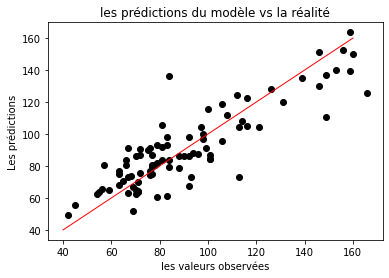

In [22]:
plt.scatter(y_train, train_predictions, color= 'black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()

In [23]:
test_predictions = model.predict(x_test)
print(f"RMSE = {round(sqrt(mean_squared_error(y_test, test_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_test, test_predictions),2)}")

RMSE = 10.21
R2_score = 0.8


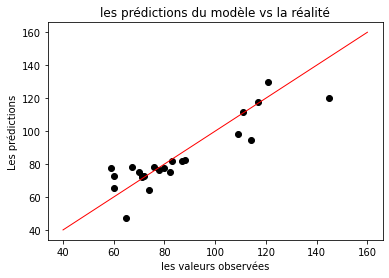

In [24]:
plt.scatter(y_test, test_predictions, color= 'black')
plt.title("les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("Les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], 'red', lw=1)
plt.show()

In [25]:
def create_evaluate_model(index_fold,x_train,x_test,y_train,y_test):
    polynomial_features = PolynomialFeatures(degree=1)
    poly_regression_alg = LinearRegression()
    model = Pipeline([
                ("polynomial_features", polynomial_features),
                ("linear_regression", poly_regression_alg)
            ])
    
    model.fit(x_train, y_train)
    test_predictions = model.predict(x_test)
    
    rmse = sqrt(mean_squared_error(y_test, test_predictions))
    r2 = r2_score(y_test, test_predictions)
    print(f"Run {index_fold} : RMSE = {round(rmse,2)} - R2_score = {round(r2,2)}")

    return (rmse, r2)

In [26]:
nb_model = 4
index_fold =0
average_rmse=0
average_r2=0
kf = KFold(n_splits=nb_model,shuffle=False)
for train_index , test_index in kf.split(data):
 
    x_train = data.iloc[train_index]
    x_test= data.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    current_rmse, current_r2 = create_evaluate_model(index_fold,x_train,x_test,y_train,y_test)
    average_rmse = average_rmse + current_rmse
    average_r2 = average_r2 + current_r2
    index_fold = index_fold + 1
    
average_rmse = average_rmse / nb_model
average_r2 = average_r2 / nb_model
print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")
    

Run 0 : RMSE = 16.1 - R2_score = 0.53
Run 1 : RMSE = 18.02 - R2_score = 0.7
Run 2 : RMSE = 17.06 - R2_score = 0.68
Run 3 : RMSE = 9.27 - R2_score = 0.48
Moyenne : RMSE = 15.11 - R2_score = 0.6
